<a href="https://colab.research.google.com/github/jdchen5/machinelearninglabs/blob/main/CProject/fraud-withSections-stackedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Load the data
- [Part 2](#part2)- Hierarchical clustering


[Back to top](#Index:)

<a id='part1'></a>

### Part 1 - Load the data

Load the data and explore the datasets

In [3]:
# Replace 'your_data.csv' with the path to your data file
df = pd.read_csv('/content/gdrive/My Drive/Pythoncode/CProject/data/fraud_dataset_example.csv')

##Identify the Features and Their Types:
Use .info() to get a concise summary of the DataFrame, including the column names, non-null counts, and data types.

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
print(f'The Data consist:\n Total Rows: {df.shape[0]}\n Total columns: {df.shape[1]}')

The Data consist:
 Total Rows: 101613
 Total columns: 11


In [6]:
print(f'Total missing value in Percentage: \n {round(df.isnull().sum()/df.shape[0],2)}')

Total missing value in Percentage: 
 step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64


In [7]:
#missing value replacement using random samples imputer
def impute_nan(df,variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [8]:
#clear view of data

# Create an empty list to store the summary information
list_item = []

# Iterate over each column in the DataFrame
for col in df.columns:
    # Append the column name, data type, number of nulls, percentage of nulls, and unique value counts to the list
    list_item.append([col, df[col].dtype, df[col].isnull().sum(), (df[col].isnull().sum()/df.shape[0]), len(df[col].unique()), df[col].unique()[:4]])

# Create a DataFrame from the list with specified column names
des_df = pd.DataFrame(data=list_item, columns=['Feature', 'data_type', 'Null_number', 'Null_pct', 'Unique_counts', 'unique_value'])

# Display the summary DataFrame
des_df


,Feature,data_type,Null_number,Null_pct,Unique_counts,unique_value
0,step,int64,0,0.0,10,"[1, 2, 3, 4]"
1,type,object,0,0.0,5,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT]"
2,amount,float64,0,0.0,101069,"[9839.64, 1864.28, 181.0, 11668.14]"
3,nameOrig,object,0,0.0,101613,"[C1231006815, C1666544295, C1305486145, C84008..."
4,oldbalanceOrg,float64,0,0.0,59037,"[170136.0, 21249.0, 181.0, 41554.0]"
5,newbalanceOrig,float64,0,0.0,49018,"[160296.36, 19384.72, 0.0, 29885.86]"
6,nameDest,object,0,0.0,52280,"[M1979787155, M2044282225, C553264065, C38997010]"
7,oldbalanceDest,float64,0,0.0,54585,"[0.0, 21182.0, 41898.0, 10845.0]"
8,newbalanceDest,float64,0,0.0,19741,"[0.0, 40348.79, 157982.12, 51513.44]"
9,isFraud,int64,0,0.0,2,"[0, 1]"


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
amount,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
oldbalanceOrg,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
newbalanceOrig,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
oldbalanceDest,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
newbalanceDest,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02
isFraud,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
isFlaggedFraud,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00


In [10]:
print(f"Percentage of fraud to total samples: {round((df[df['isFraud'] == 1].shape[0] / df.shape[0]) * 100, 2)}%")
print(f"\nPercentage of fraud flagged to total samples: {round((df[df['isFlaggedFraud'] == 1].shape[0] / df.shape[0]) * 100, 2)}%")


Percentage of fraud to total samples: 0.11%

Percentage of fraud flagged to total samples: 0.0%


In [11]:
# Perform a Descriptive Statistical Summary:
#Use .describe() to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.
summary_stats=df.describe(include='all')  # include='all' will also summarize categorical data
print(summary_stats)

                 step     type        amount     nameOrig  oldbalanceOrg  \
count   101613.000000   101613  1.016130e+05       101613   1.016130e+05   
unique            NaN        5           NaN       101613            NaN   
top               NaN  PAYMENT           NaN  C1231006815            NaN   
freq              NaN    40062           NaN            1            NaN   
mean         8.523457      NaN  1.740901e+05          NaN   9.071753e+05   
std          1.820681      NaN  3.450199e+05          NaN   2.829575e+06   
min          1.000000      NaN  3.200000e-01          NaN   0.000000e+00   
25%          8.000000      NaN  1.001659e+04          NaN   0.000000e+00   
50%          9.000000      NaN  5.338541e+04          NaN   2.019047e+04   
75%         10.000000      NaN  2.124984e+05          NaN   1.947150e+05   
max         10.000000      NaN  1.000000e+07          NaN   3.893942e+07   

        newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  \
count     1.01613

In [12]:
#Identify Skewness:
#Check the skewness of the distribution of numerical data. A skewness value closer to 0 indicates a more symmetric distribution, while a value far from 0 indicates a skewed distribution.
numeric_cols = df.select_dtypes(include=[np.number])
skewness = numeric_cols.skew()
# A skewness value:
#Closer to 0 indicates a more symmetric distribution;
#Greater than 0 indicates a right-skewed (or positively skewed) distribution.
#Less than 0 indicates a left-skewed (or negatively skewed) distribution.

print(skewness)
print(numeric_cols)


step              -2.553444
amount             5.425476
oldbalanceOrg      5.295054
newbalanceOrig     5.223139
oldbalanceDest     5.059426
newbalanceDest     4.322121
isFraud           29.546591
isFlaggedFraud     0.000000
dtype: float64
        step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1     9839.64      170136.00       160296.36            0.00   
1          1     1864.28       21249.00        19384.72            0.00   
2          1      181.00         181.00            0.00            0.00   
3          1      181.00         181.00            0.00        21182.00   
4          1    11668.14       41554.00        29885.86            0.00   
...      ...         ...            ...             ...             ...   
101608    10     7477.02         785.00            0.00            0.00   
101609    10   282252.35      220339.29            0.00        95156.01   
101610    10    17289.01           0.00            0.00            0.00   
101611    1

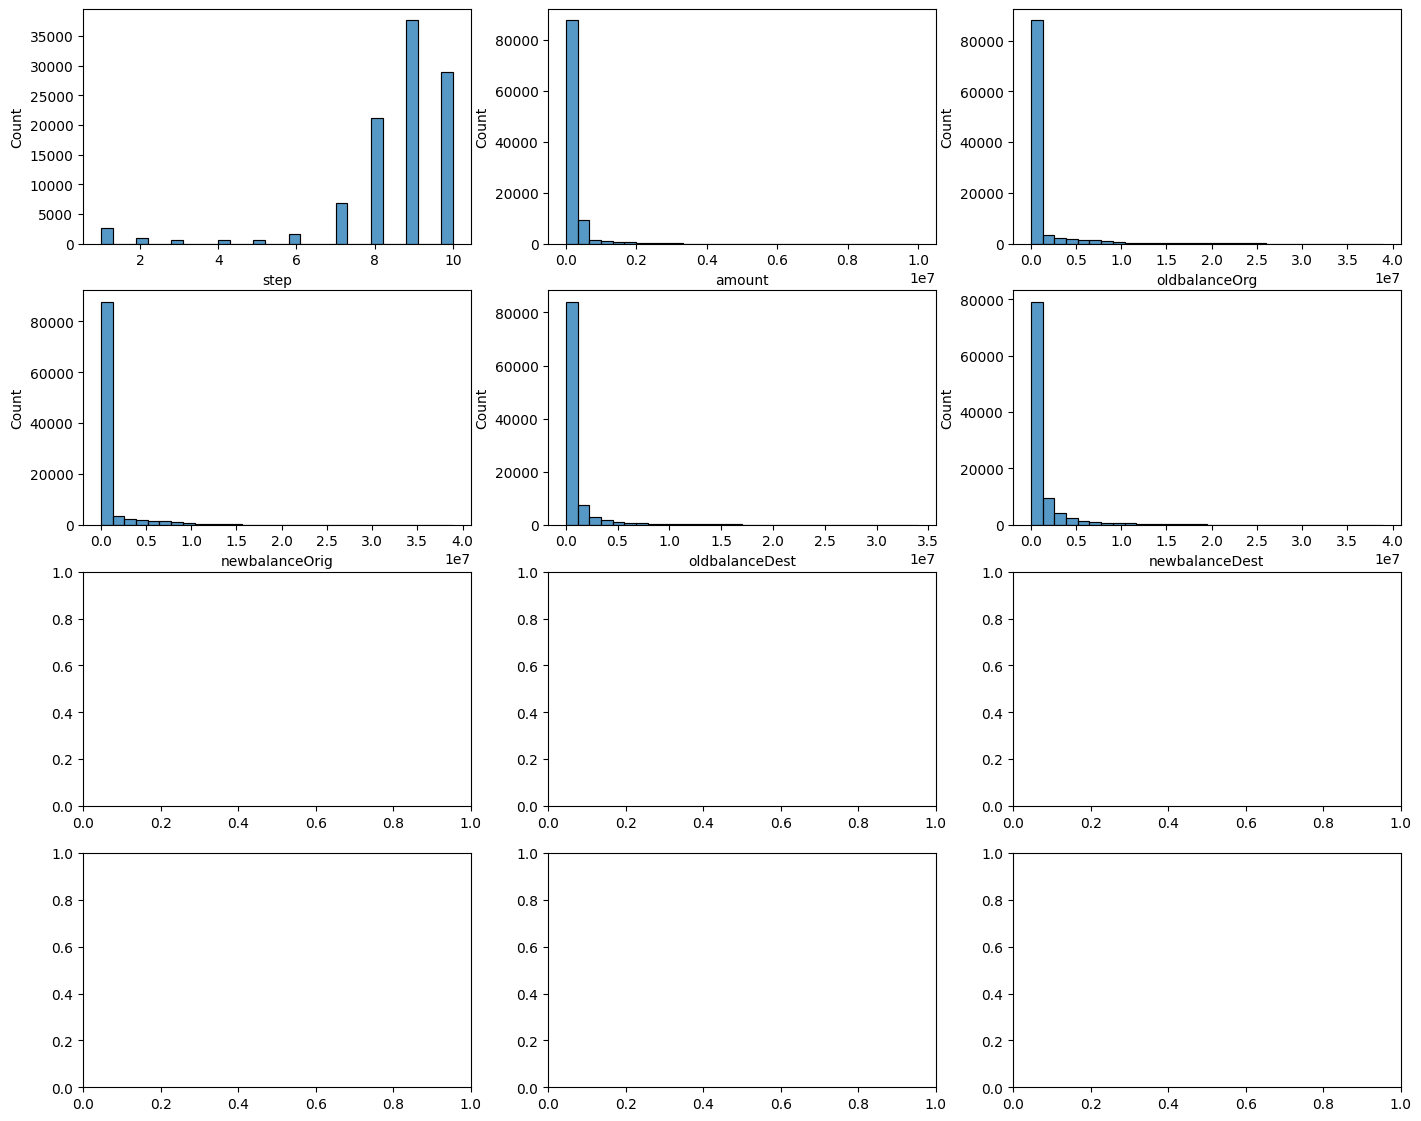

In [13]:
# List of numerical variables to visualize
num1 = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']

# Set up a grid of plots with 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(17, 14))

# Flatten the array of axes to make it easier to iterate over
axs = axs.flatten()

# Loop through the list of variables and create a histogram for each
for i, var in enumerate(num1):
    sns.histplot(x=var, data=df, ax=axs[i], bins=30)

# Display the plots
plt.show()


step:


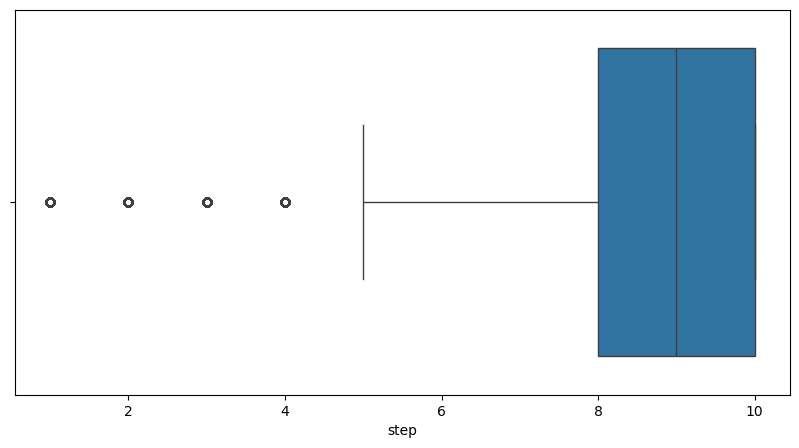

amount:


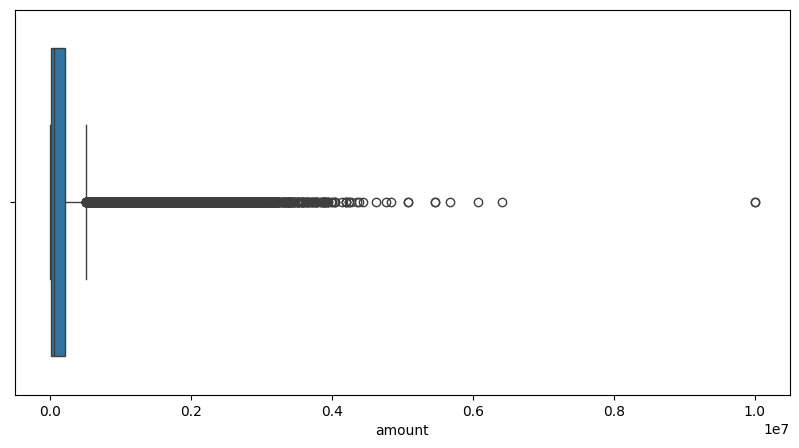

oldbalanceOrg:


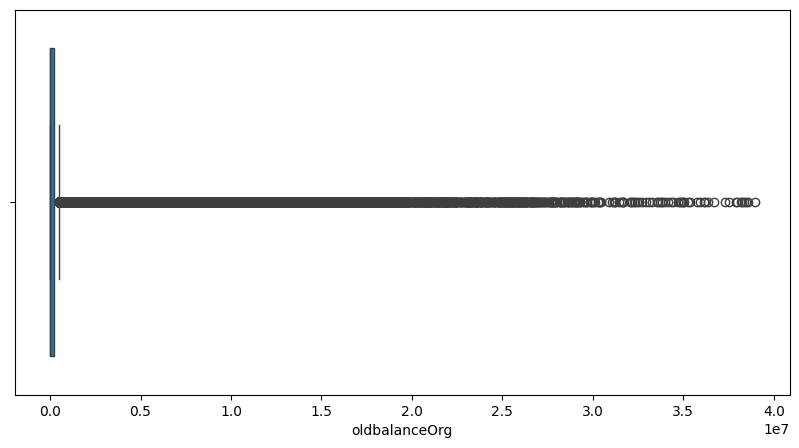

newbalanceOrig:


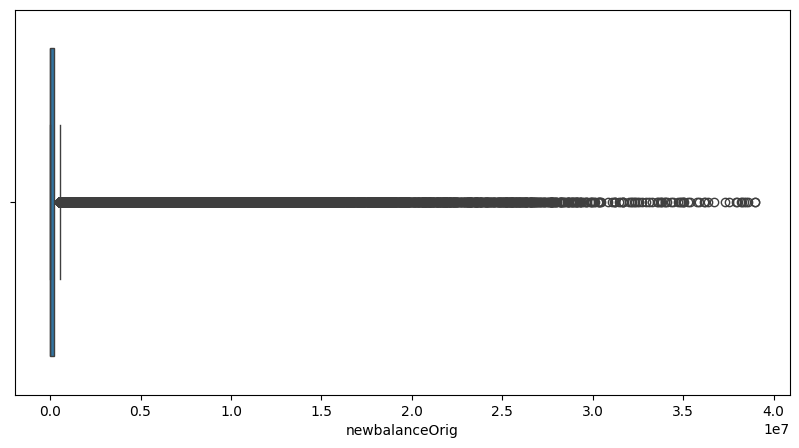

oldbalanceDest:


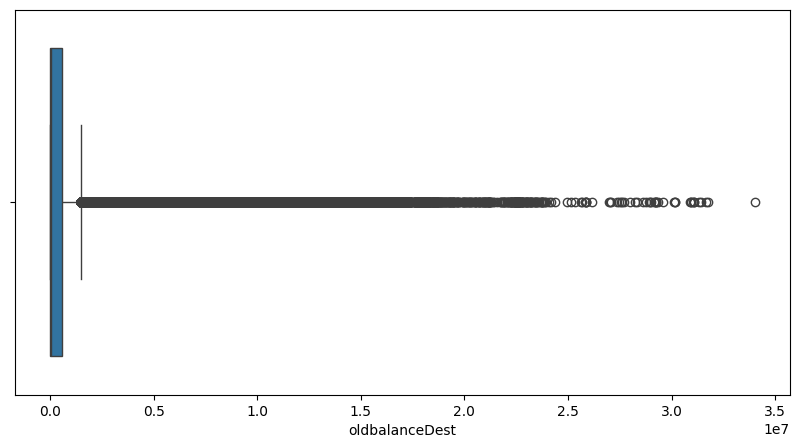

newbalanceDest:


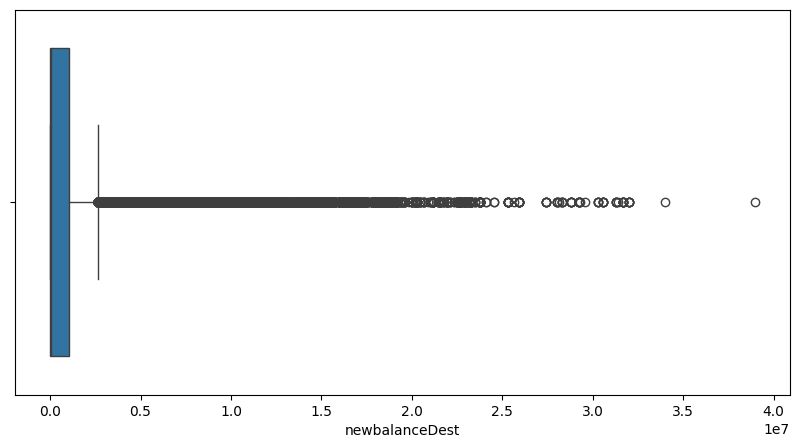

In [14]:
#Numerical values Visulisation wtih box plot

# Numerical values visualization with box plot
for i in num1:
    plt.figure(figsize=(10,5))  # Set the figure size for each box plot
    print(i + ":")
    sns.boxplot(x=i, data=df)   # Create a box plot for the variable `i`
    plt.show()                  # Display the plot


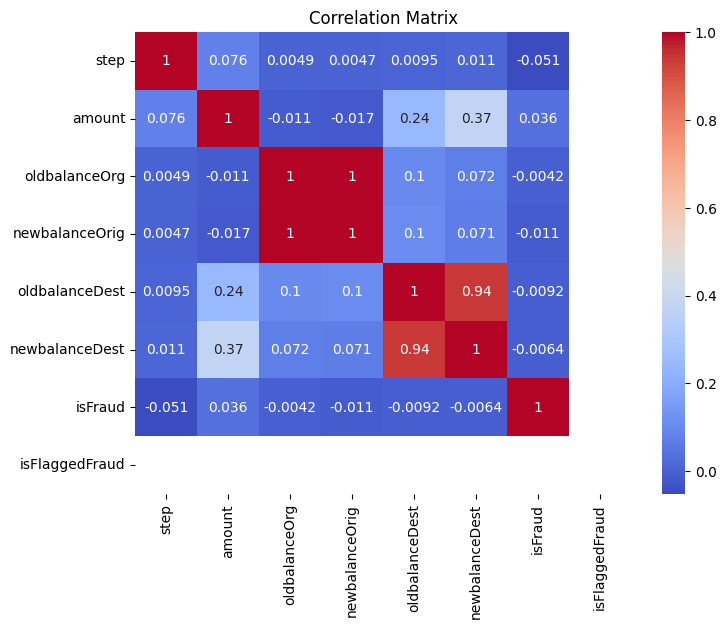

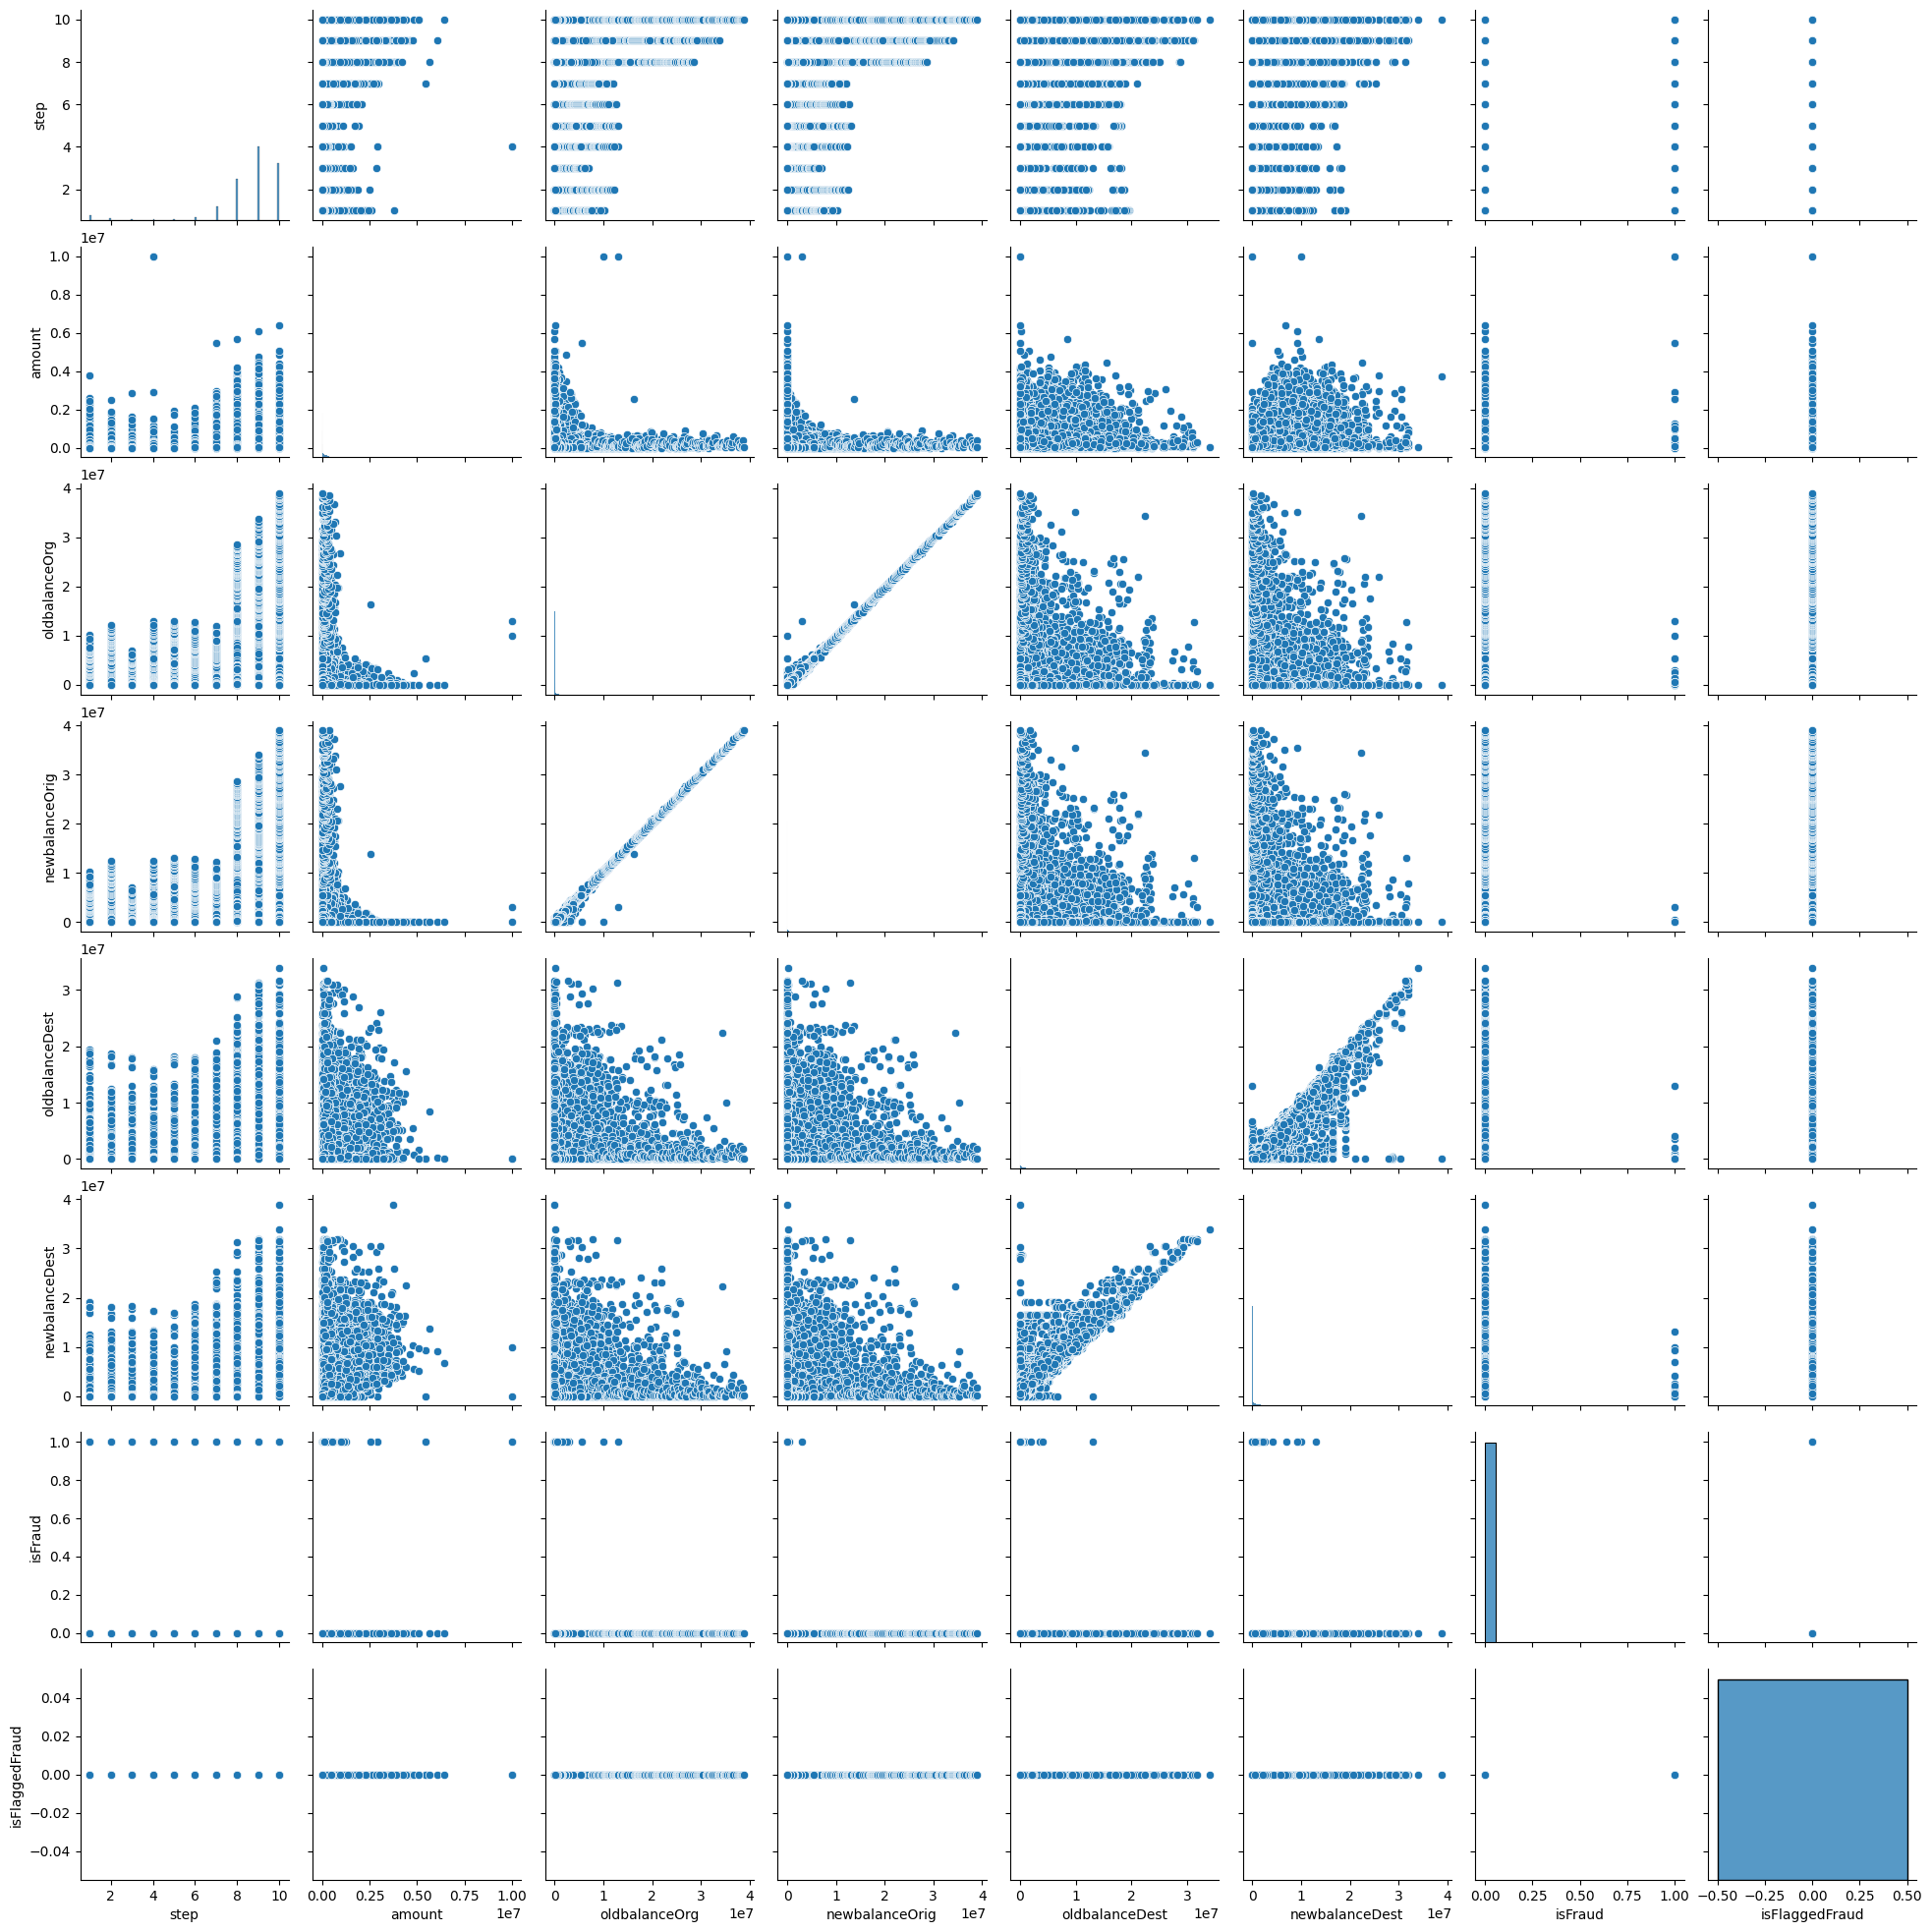

In [15]:
# Correlation Heatmap:
# A heatmap to understand the correlation between numerical features and potentially the isFraud label.
# This will help to see if any feature strongly correlates with the occurrence of fraud.
# Calculate the correlation matrix
correlations = df.corr(numeric_only=True)

# Plotting the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

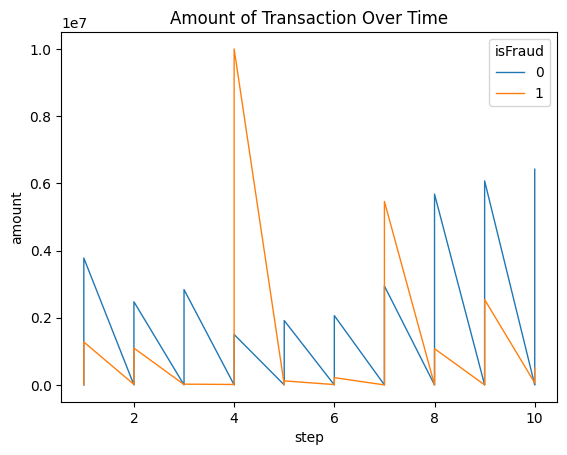

In [16]:
# Time Step Analysis:
# Plot the time step (step) against other features to understand if there's a pattern over time.
# For instance, you could plot a line or bar chart to see if fraud occurrences increase at certain time steps.

sns.lineplot(x='step', y='amount', data=df, hue='isFraud', estimator=None, lw=1)
plt.title('Amount of Transaction Over Time')
plt.show()

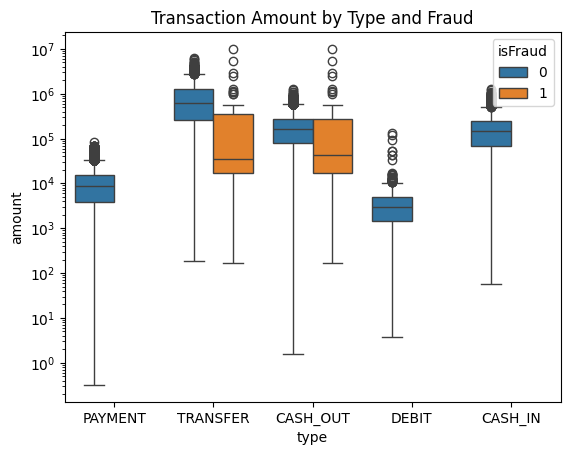

In [17]:
# Boxplots for Transaction Amount by Type:
# Boxplots grouped by transaction type and colored by fraud to see the distribution of amounts across different types of transactions and how they relate to fraud.
sns.boxplot(x='type', y='amount', data=df, hue='isFraud')
plt.title('Transaction Amount by Type and Fraud')
plt.yscale('log')  # Use log scale due to large range of transaction amounts
plt.show()

In [18]:
obj1 = ['type', 'nameOrig', 'nameDest']

In [20]:
import subprocess
import sys

# Check if colorama is installed and attempt to install it if not
try:
    import colorama
    print("Colorama is already installed.")
except ImportError as e:
    print("Colorama not found. Installing colorama...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "colorama"])
    try:
        import colorama
        print("Colorama installed successfully.")
    except ImportError:
        print("Failed to install colorama.")

Colorama not found. Installing colorama...
Colorama installed successfully.


In [22]:
# Import the necessary libraries for hypothesis testing
from scipy.stats import chi2_contingency
#import stats as stat
import colorama
from colorama import Fore

In [23]:
# Chi-square test to determine whether each categorical variable in a dataset is a good predictor of the target variable isFraud.
for i in obj1:
    print("-"*100)
    a = np.array(pd.crosstab(df['isFraud'], df[i]))         # creates a contigency table beteween each categorical variable and the target vairable
    (stats, p, dof, _) = chi2_contingency(a, correction=False)  # performs the Chi-squar test of independence
    if p >= 0.05:    #at a 95% confidence level
        print(Fore.RED + "{} is Bad predictor\n".format(i))
        print("P_value={:.2f}\n".format(p))
    else:
        print(Fore.GREEN + "{} is Good Predictor\n".format(i))
        print("P_value={:.2f}\n".format(p))

----------------------------------------------------------------------------------------------------
type is Good Predictor

P_value=0.00

----------------------------------------------------------------------------------------------------
nameOrig is Bad predictor

P_value=0.50

----------------------------------------------------------------------------------------------------
nameDest is Bad predictor

P_value=1.00



In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf

In [25]:
# Anova test for numerical values differ significantly across different catefories of the target variable
for i in num1:
    print("_"*100)
    print(i + ":\n")
    print("Anova:\n")
    formula = '{} ~ isFraud'.format(i)  # dynamically create the formula string
    mod = ols(formula, data=df).fit()    #  fits an Ordinary Least Squares (OLS) regression model based on the formula. The ols function comes from the statsmodels package.
    aov_table = smf.stats.anova_lm(mod, typ=2)   # performs the ANOVA test using the fitted model. The anova_lm function generates an ANOVA table. typ=2 specifies the type of sum of squares to be used in the test.
    print(aov_table, '\n')
    print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]

    if p>0.05:  #
        print(Fore.RED + "'{}' is 'bad predictor'\n".format(i))
        print('Avg of this feature is same for both loan default and non default group\n')
        print("p_val(p) = {}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both fraud group and non fraud group\n')
        print('We need to perform Tukey as atleast one category \n')
        print(Fore.GREEN +" '{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.isFraud,alpha=0.05)  # performs the Tukey HSD post-hoc test to determine which specific groups in isFraud are different in terms of the mean of variable i.
        print(tukey,'\n')

____________________________________________________________________________________________________
step:

Anova:

                 sum_sq        df           F        PR(>F)
isFraud      893.298942       1.0  270.195653  1.232291e-60
Residual  335938.042147  101611.0         NaN           NaN 

p_value=0.00

TUKEY:

'step' is a 'good Predictor'

Avg of this feature is not same for both fraud group and non fraud group

We need to perform Tukey as atleast one category 

 'step' is a 'good Predictor'

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -2.7766   0.0 -3.1077 -2.4456   True
--------------------------------------------------- 

____________________________________________________________________________________________________
amount:

Anova:

                sum_sq        df           F        PR(>F)
isFraud   1.568344e+13       1.0  131.920453  1.626484e

In [26]:
#Drop the columns based on the hypothesis testing
df1=df.drop(['nameOrig', 'nameDest', 'oldbalanceOrg'],axis=1)

In [27]:
df1.select_dtypes(include='object').columns

Index(['type'], dtype='object')

In [28]:
# Function to replace categorical values with percentages
def replace_with_percentage(column):
    counts = column.value_counts(normalize=True)
    return column.map(counts)*100

In [29]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = replace_with_percentage(df1[col])

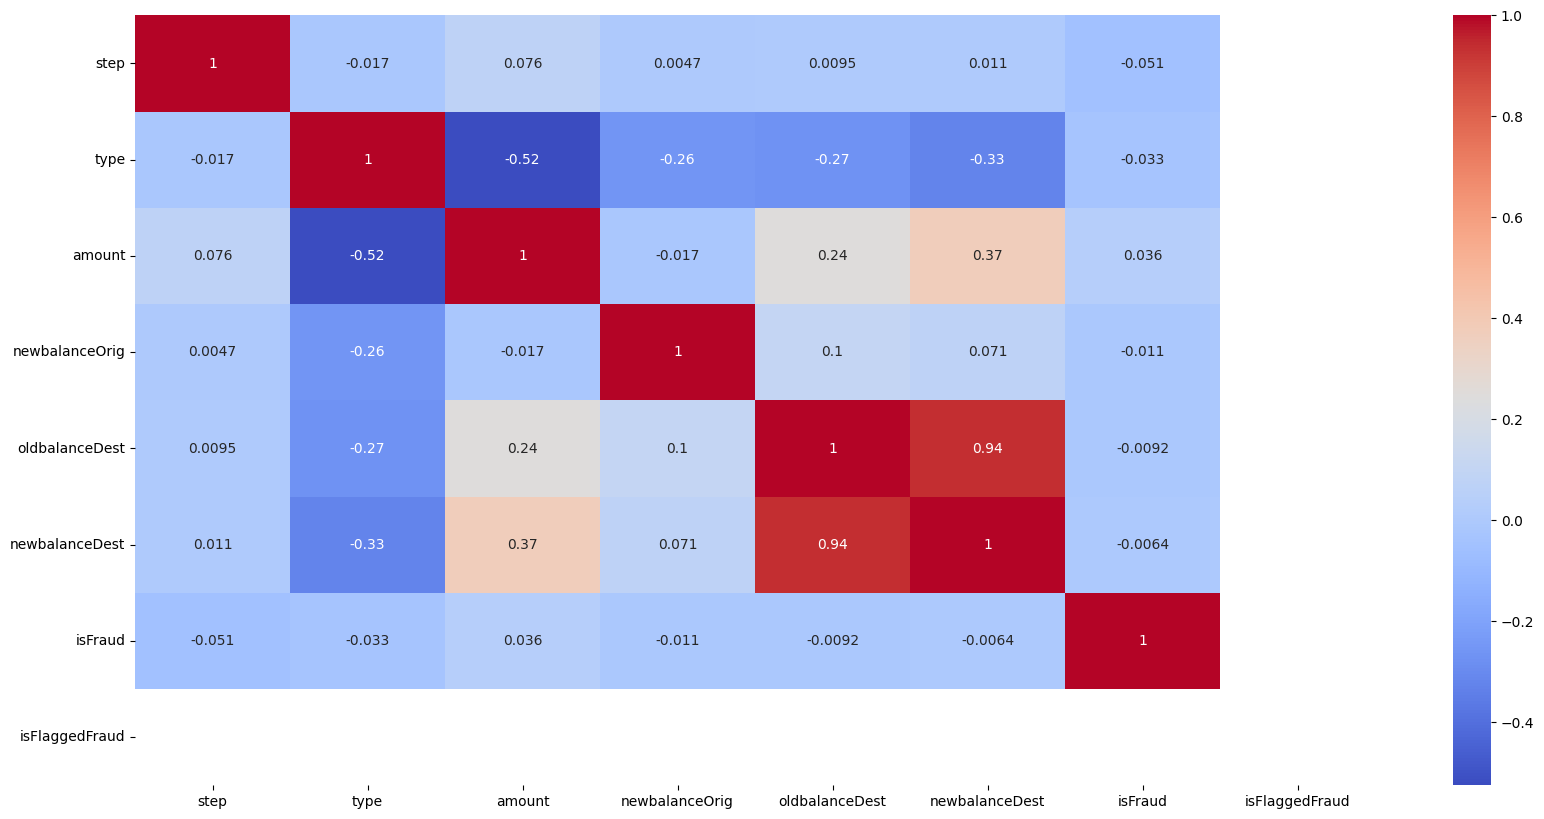

In [30]:
#Correlation matrix after converting the categorical values
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(),cmap='coolwarm',annot=True);

[Back to top](#Index:)

<a id='part2'></a>

### Part 2 - Optimisation


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Split the data for train and test
X=df1.drop('isFraud',axis=1)  # Features
y=df1.isFraud                 #Target variable

In [33]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, chart_title):
    """
    Plots a confusion matrix using seaborn's heatmap.

    Parameters:
    y_true : array-like of shape (n_samples,) - True labels of the data.
    y_pred : array-like of shape (n_samples,) - Predicted labels by the classifier.

    Returns:
    None
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a figure for the plot
    plt.figure(figsize=(7,5))

    # Create a heatmap for the confusion matrix
    sns.heatmap(data=cm, annot=True, cmap="Blues", linewidths=0.5, fmt="d")

    # Label the axes
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Set the title of the plot
    plt.title(f"{chart_title} Confusion Matrix")

    # Display the plot
    plt.show()

In [34]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

def plot_precision_recall_curve(model, X_test, y_test, chart_title):
    """
    Plots the Precision-Recall curve and calculates the AUC for a given model and test data.

    Parameters:
    model : The trained classifier with predict_proba method available.
    X_test : The test set features.
    y_test : The true binary labels for the test set.

    Returns:
    None
    """
    # Ensure that the model has a predict_proba method
    if not hasattr(model, 'predict_proba'):
        raise AttributeError(f"The passed model doesn't support predict_proba method.")

    # Get the probability scores of the positive class
    y_scores = model.predict_proba(X_test)[:, 1]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    # Calculate the average precision score
    pr_auc = average_precision_score(y_test, y_scores)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')

    # Labeling the plot
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.title(f"{chart_title} Precision-Recall Curve")
    plt.legend(loc='best')

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'rfc2' is a trained RandomForestClassifier instance
# and you have 'X_test' and 'y_test' data ready
# plot_precision_recall_curve(rfc2, X_test, y_test)


In [35]:
# Split the data into training plus validation and testing sets with stratification
# This ensures that the proportion of classes in both splits will be the same as in the entire dataset

X_train_val,X_test,y_train_val,y_test=train_test_split(X, y,test_size=0.20,stratify=y, random_state=42)

# Next, split the training plus validation dataset into separate training and validation datasets
# Here, I'm using 80-20 split, but you can adjust the size according to your preference
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)


In [37]:
try:
    from skopt import BayesSearchCV
    print("scikit-optimize is already installed.")
except ImportError:
    print("scikit-optimize not found. Installing scikit-optimize...")
    !pip install scikit-optimize
    # After installation, try importing again
    try:
        from skopt import BayesSearchCV
        print("scikit-optimize has been successfully installed.")
    except ImportError:
        print("Failed to install scikit-optimize.")

scikit-optimize not found. Installing scikit-optimize...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.5 MB/s eta 0:00:00
scikit-optimize has been successfully installed.


In [39]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [41]:
# Define column names
columns = ['Model', 'Accuracy (%)', 'Precision', 'Recall', 'F1-Score', 'AUC']

# Create an empty DataFrame with these columns
model_performance_df = pd.DataFrame(columns=columns)

# Display the empty DataFrame
print(model_performance_df)

Empty DataFrame
Columns: [Model, Accuracy (%), Precision, Recall, F1-Score, AUC]
Index: []


# Using GridSearchCV LogisticRegression from sklearn.linear_model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the parameter grid for LogisticRegression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initialize the model
log_reg = LogisticRegression(solver='liblinear', random_state=42)  # solver is chosen for compatibility with smaller datasets

# Fit the model
#log_reg.fit(X_train, y_train)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Predictions
y_pred_log_reg_grid = grid_search.predict(X_test)

# Retrieve the best parameters
print("Best parameters found for Logistic Regression:", grid_search.best_params_)

# Basic Evaluation
accuracy = accuracy_score(y_test, y_pred_log_reg_grid)
print(f'Accuracy of Logistic Regression: {round(accuracy*100,2)}%')

# Detailed classification report
print(classification_report(y_test, y_pred_log_reg_grid))

# For AUC, ensure your model can estimate probabilities and the target variable is binary
if 'predict_proba' in dir(grid_search.best_estimator_) and len(set(y_test)) == 2:
    y_pred_prob = grid_search.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f'AUC: {auc_score:.2f}')
else:
    print("AUC can't be calculated for this setup.")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_log_reg_grid, average='weighted')
recall = recall_score(y_test, y_pred_log_reg_grid, average='weighted')
f1 = f1_score(y_test, y_pred_log_reg_grid, average='weighted')

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)  # Ensure y_pred_prob is the probability of the positive class

# Append the metrics to the DataFrame
new_row = {
    'Model': 'Logistic Regression (GridSearchCV)',
    'Accuracy (%)': round(accuracy * 100, 2),
    'Precision': round(precision, 2),
    'Recall': round(recall, 2),
    'F1-Score': round(f1, 2),
    'AUC': round(auc, 2)
}

model_performance_df = model_performance_df.append(new_row, ignore_index=True)

# Display the updated DataFrame
print(model_performance_df)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of Logistic Regression: 99.89%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.00      0.00      0.00        23

    accuracy                           1.00     20323
   macro avg       0.50      0.50      0.50     20323
weighted avg       1.00      1.00      1.00     20323

AUC: 0.92
                                Model  Accuracy (%)  Precision  Recall  \
0  Logistic Regression (GridSearchCV)         99.89        1.0     1.0   

   F1-Score   AUC  
0       1.0  0.92  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

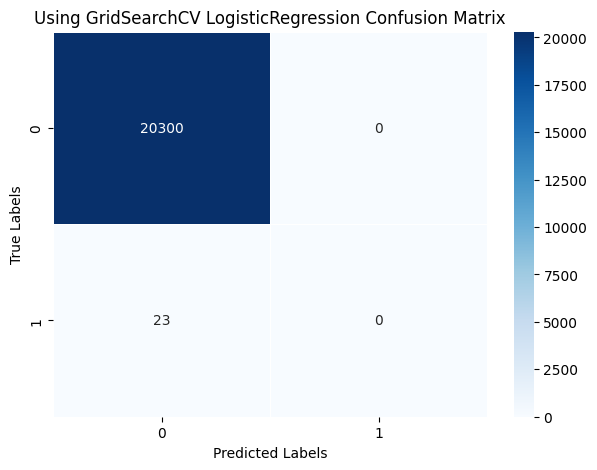

In [43]:
plot_confusion_matrix(y_test, y_pred_log_reg_grid, "Using GridSearchCV LogisticRegression")

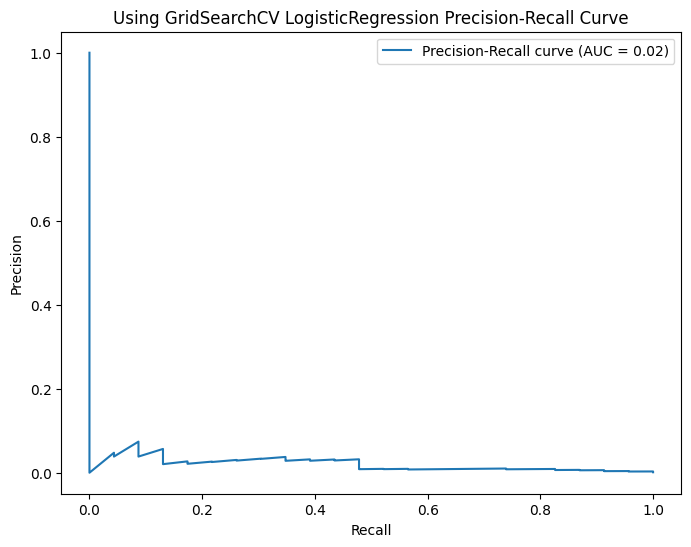

In [44]:
plot_precision_recall_curve(grid_search, X_test, y_test,"Using GridSearchCV LogisticRegression")

# Using BayesSearchCV with RandomForestClassifier

In [45]:
#using BayesSearchCV
param_space = {
    'n_estimators': (10,200),        # Number of trees in the forest
    'max_depth': (1,20),             # Maximum depth of the tree
    'min_samples_split': (2,10),      # Minimun number of samples required to split an internal code
    'min_samples_leaf': (1,10),       # Minimum number of samples required to be at a leaf node
}

bayes_search = BayesSearchCV(
    rfc,
    param_space,
    n_iter=50,            # Number of optimisation steps
    n_jobs=-1,            # Use all available cores for parallelisation
    cv=5,                 # Number of cross-validation folds
    random_state=42
)

bayes_search.fit(X_train,y_train)

best_params = bayes_search.best_params_
print("Best hyperparameters:",best_params)


Best hyperparameters: OrderedDict([('max_depth', 15), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 12)])


In [46]:
rfc_bayes=RandomForestClassifier(**best_params)
rfc_bayes.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=12)

In [47]:
# Prediction with RandomForestClassifier
y_pred_randomforest_bayessearch=rfc_bayes.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [50]:
print(f'Model Accuracy score: {round(accuracy_score(y_pred_randomforest_bayessearch,y_test)*100,2)}%')

Model Accuracy score: 99.93%


In [52]:
# Generate probability predictions for the positive class
y_pred_prob = rfc_bayes.predict_proba(X_test)[:, 1]


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_randomforest_bayessearch, average='weighted')
recall = recall_score(y_test, y_pred_randomforest_bayessearch, average='weighted')
f1 = f1_score(y_test, y_pred_randomforest_bayessearch, average='weighted')

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)  # Ensure y_pred_prob is the probability of the positive class

# Append the metrics to the DataFrame
new_row = {
    'Model': 'Random Forest (BayesSearchCV)',
    'Accuracy (%)': round(accuracy * 100, 2),
    'Precision': round(precision, 2),
    'Recall': round(recall, 2),
    'F1-Score': round(f1, 2),
    'AUC': round(auc, 2)
}

model_performance_df = model_performance_df.append(new_row, ignore_index=True)

# Display the updated DataFrame
print(model_performance_df)

                                Model  Accuracy (%)  Precision  Recall  \
0  Logistic Regression (GridSearchCV)         99.89        1.0     1.0   
1       Random Forest (BayesSearchCV)         99.89        1.0     1.0   
2       Random Forest (BayesSearchCV)         99.89        1.0     1.0   

   F1-Score   AUC  
0       1.0  0.92  
1       1.0  0.92  
2       1.0  0.84  


<ipython-input-52-5c0ed54177d7>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance_df = model_performance_df.append(new_row, ignore_index=True)


In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_log_reg_randomforest, average='weighted')
recall = recall_score(y_test, y_pred_log_reg_randomforest, average='weighted')
f1 = f1_score(y_test, y_pred_log_reg_randomforest, average='weighted')

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)  # Ensure y_pred_prob is the probability of the positive class

# Append the metrics to the DataFrame
new_row = {
    'Model': 'Random Forest (BayesSearchCV)',
    'Accuracy (%)': round(accuracy * 100, 2),
    'Precision': round(precision, 2),
    'Recall': round(recall, 2),
    'F1-Score': round(f1, 2),
    'AUC': round(auc, 2)
}

model_performance_df = model_performance_df.append(new_row, ignore_index=True)

# Display the updated DataFrame
print(model_performance_df)

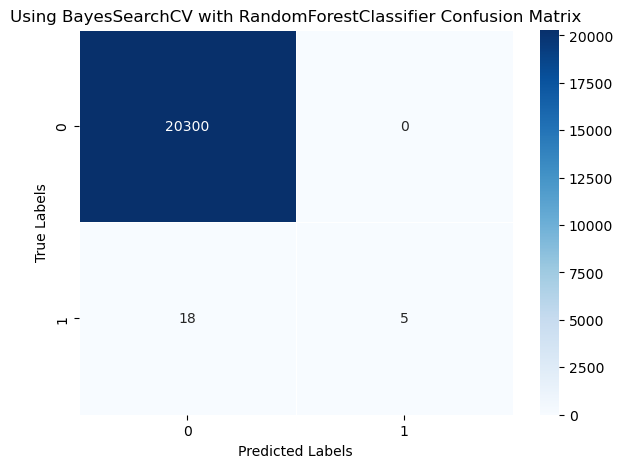

In [ ]:
# Plot the confusion matrix to check the true positive and false positive visa versa for Using BayesSearchCV with RandomForestClassifier

plot_confusion_matrix(y_test, y_pred, "Using BayesSearchCV with RandomForestClassifier")


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       1.00      0.22      0.36        23

    accuracy                           1.00     20323
   macro avg       1.00      0.61      0.68     20323
weighted avg       1.00      1.00      1.00     20323



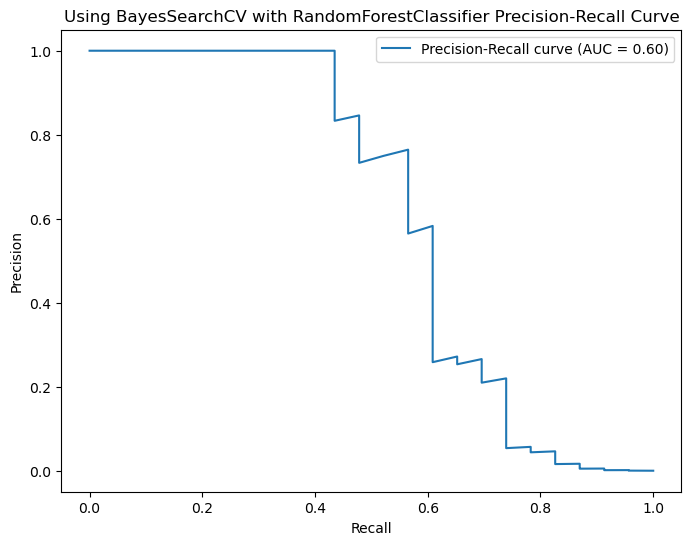

In [ ]:
plot_precision_recall_curve(rfc_bayes, X_test, y_test, "Using BayesSearchCV with RandomForestClassifier")

<span style="font-size: 40px; color: blue;"><strong>Using GridSearchCV with RandomForestClassifier</strong></span>



In [ ]:
# Define a broader parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True, False]
}

In [ ]:
# Fit the RandomForestClassifier with hyperparameters
#rfc2 = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0, max_features='sqrt')
#rfc2.fit(X_train, y_train)

# Initialize the RandomForestClassifier
rfc2 = RandomForestClassifier(random_state=0)   # will be renamed to rfc_grid

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rfc2 = grid_search.best_estimator_


Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


KeyboardInterrupt: 

In [ ]:
# Make predictions with the trained model
#pr = rfc2.predict(X_test)

# Print the model accuracy
#print(f'Model Accuracy score:{round(accuracy_score(pr, y_test) * 100, 2)}%')


# Make predictions with the trained model
y_pred_randomforest_gridsearch = best_rfc2.predict(X_test)

# Print the model accuracy
print(f'Model Accuracy score: {round(accuracy_score(pr, y_test) * 100, 2)}%')

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_randomforest_gridsearch, average='weighted')
recall = recall_score(y_test, y_pred_randomforest_gridsearch, average='weighted')
f1 = f1_score(y_test, y_pred_randomforest_gridsearch, average='weighted')

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)  # Ensure y_pred_prob is the probability of the positive class

# Append the metrics to the DataFrame
new_row = {
    'Model': 'Random Forest (GridSearchCV)',
    'Accuracy (%)': round(accuracy * 100, 2),
    'Precision': round(precision, 2),
    'Recall': round(recall, 2),
    'F1-Score': round(f1, 2),
    'AUC': round(auc, 2)
}

model_performance_df = model_performance_df.append(new_row, ignore_index=True)

# Display the updated DataFrame
print(model_performance_df)

In [ ]:
# Plot the confusion matrix to check the true positive and false positive visa versa for Using GridSearchCV with RandomForestClassifier

plot_confusion_matrix(y_test, pr,"Using GridSearchCV with RandomForestClassifier")


In [ ]:
print(classification_report(y_test, pr))

In [ ]:
plot_precision_recall_curve(best_rfc2, X_test, y_test,"Using GridSearchCV with RandomForestClassifier")

# Using GridSearchCV with DecisionTreeClassifier from sklearn.tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
    "random_state": [0, 42]
}

# Create a DecisionTreeClassifier with 'balanced' class weight
decision_tree = DecisionTreeClassifier(class_weight='balanced')

# Create a GridSearchCV object with the DecisionTreeClassifier
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

# Fit the GridSearchCV object with training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
# Create a DecisionTreeClassifier with the best parameters found
d_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=0)

# Fit the DecisionTreeClassifier with training data
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
# Make predictions with the trained Decision Tree model
pred = d_tree.predict(X_test)

# Print the model accuracy
print(f'Model Accuracy score:{round(accuracy_score(pred, y_test) * 100, 2)}%')

Model Accuracy score:99.89%


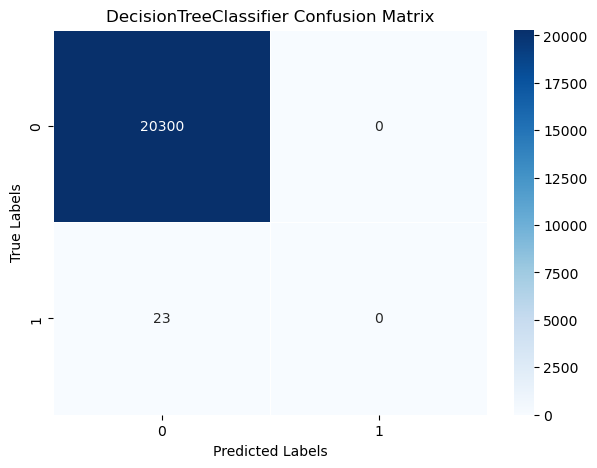

In [ ]:
plot_confusion_matrix(y_test, pred,"DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.00      0.00      0.00        23

    accuracy                           1.00     20323
   macro avg       0.50      0.50      0.50     20323
weighted avg       1.00      1.00      1.00     20323



C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

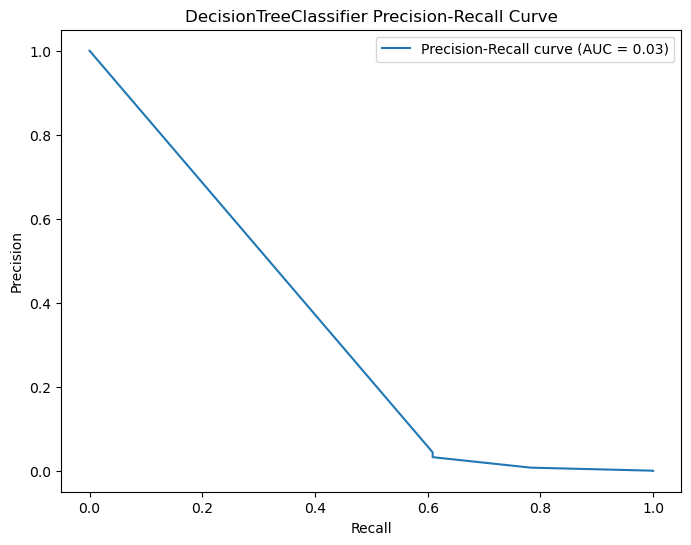

In [ ]:
plot_precision_recall_curve(d_tree, X_test, y_test,"DecisionTreeClassifier")

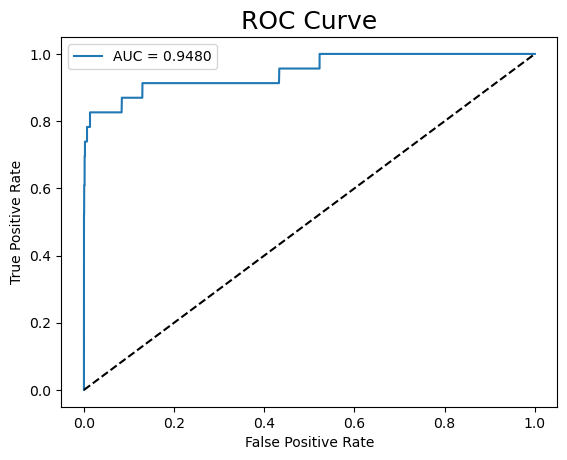

In [ ]:
# Lets plot the ROC curve bases on the predicted results for Using GridSearchCV with RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


# Predict the probabilities for the positive class
y_pred_prob = rfc2.predict_proba(X_test)[:,1]

# Create a dataframe with actual and predicted probabilities
df_actual_predicted = pd.concat([
    pd.DataFrame(np.array(y_test), columns=['y_actual']),
    pd.DataFrame(y_pred_prob, columns=['y_pred_prob'])
], axis=1)

# Set the index of the dataframe to be the same as y_test's index
df_actual_predicted.index = y_test.index

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = %.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=18)
plt.legend()
plt.show()


In [ ]:

# Check the features importance using rfc
imp_fea = pd.DataFrame({'Feature_name': X_train.columns, 'importance': rfc2.feature_importances_})
imp_fea = imp_fea.sort_values(by='importance', ascending=False)


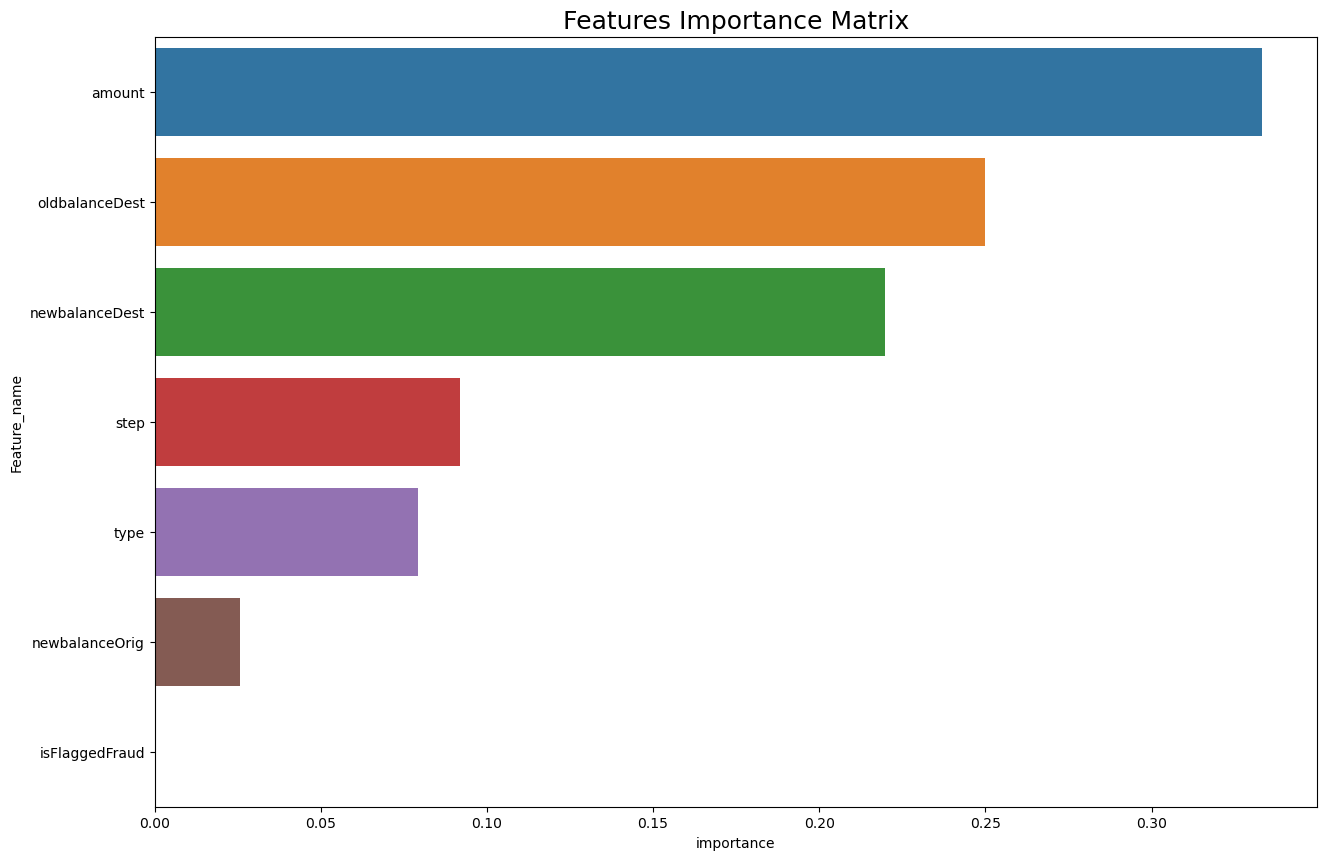

In [ ]:
# Plot the features importance matrix
fe1 = imp_fea.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=fe1, x="importance", y="Feature_name")
plt.title("Features Importance Matrix", fontsize=18)
plt.show()


# Model stacking and boosting

Stacked Model Accuracy: 99.9016%


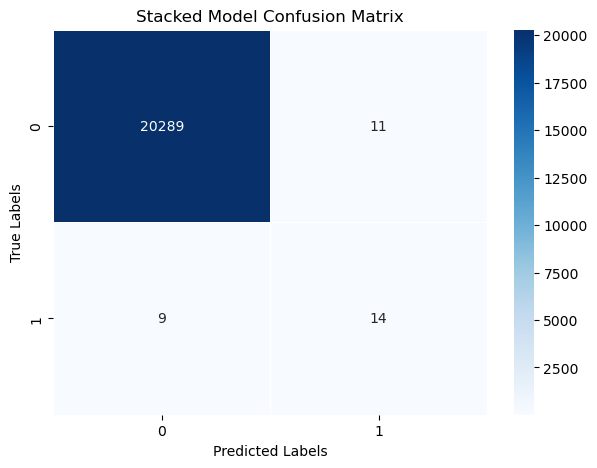

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.56      0.61      0.58        23

    accuracy                           1.00     20323
   macro avg       0.78      0.80      0.79     20323
weighted avg       1.00      1.00      1.00     20323



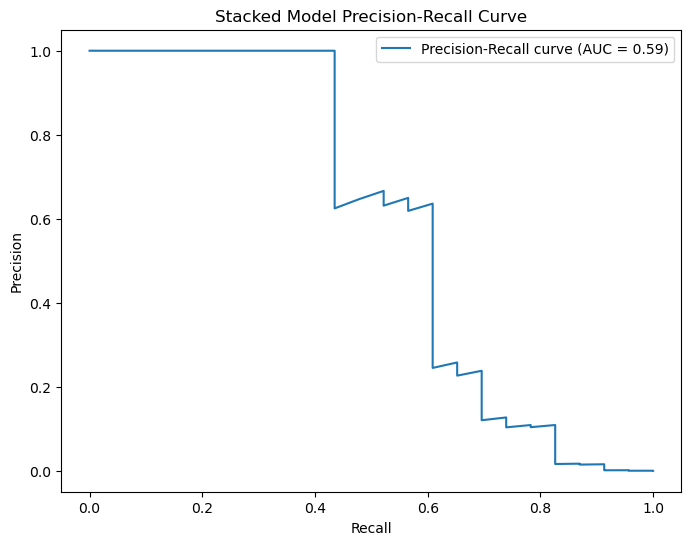

['stacked_model.joblib']

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

# Define class weights for cost-sensitive learning
# Increase the weight of class 1 if it is the minority and more important class
class_weights = {0: 1, 1: 10}  # You may need to adjust the weights depending on your specific problem

# Define base learners with the best parameters found
base_learners = [
    ('rfc_bayes', RandomForestClassifier(
        n_estimators=194,
        max_depth=9,
        min_samples_split=3,
        min_samples_leaf=1,
        class_weight=class_weights,  # Add class weights here
        random_state=0
    )),  # Parameters based on BayesSearchCV results
    ('best_rfc2', RandomForestClassifier(  # will be renamed to rfc_grid
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        bootstrap=False,
        class_weight=class_weights,  # Add class weights here
        random_state=0
    ))  # Parameters based on GridSearchCV results
]

# Define the meta-learner with the best parameters found
meta_learner = LogisticRegression(
    C=1,
    penalty='l1',
    solver='liblinear',
    class_weight=class_weights  # Add class weights here
)

# Initialize StackingClassifier with multiple base learners and a meta learner
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacked_model.predict(X_test)
stacked_model_accuracy = accuracy_score(y_test, y_pred)
print(f'Stacked Model Accuracy: {round(stacked_model_accuracy*100,4)}%')

plot_confusion_matrix(y_test, y_pred,"Stacked Model")
print(classification_report(y_test, y_pred))
plot_precision_recall_curve(stacked_model, X_test, y_test,"Stacked Model")


# Save the model using joblib for persistence
dump(stacked_model, 'stacked_model.joblib')

<span style="font-size: 40px; color: red;"><strong>Save the model to disk</strong></span>

In [ ]:
from joblib import dump

# Save the model to disk
dump(best_rfc2, 'best_rfc2.joblib')

['best_rfc2.joblib']

In [ ]:
from joblib import load

# Load the model from disk
best_rfc2 = load('best_rfc2.joblib')
